In [27]:
import pandas as pd
import numpy as np
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from joblib import dump
from src.data import make_dataset
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
from  matplotlib.ticker import FuncFormatter
import seaborn as sns

# Set paths

In [41]:
project_dir = Path.cwd().parent
data_dir = project_dir / 'data'
raw_data_dir = data_dir / 'raw'
interim_data_dir = data_dir / 'interim'
report_dir = project_dir / 'reports'

# Download data

In [5]:
competition = 'uts-advdsi-nba-career-prediction'
make_datasetdownload_data(competition=competition,
                          path=raw_data_dir,
                          unzip=True)

# Load data

In [6]:
df_train = pd.read_csv(raw_data_dir / 'train.csv')
df_train

,Id,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,10556,80,24.3,7.8,3.0,6.4,45.7,0.1,0.3,22.6,...,2.9,72.1,2.2,2.0,3.8,3.2,1.1,0.2,1.6,1
1,5342,75,21.8,10.5,4.2,7.9,55.1,-0.3,-1.0,34.9,...,3.6,67.8,3.6,3.7,6.6,0.7,0.5,0.6,1.4,1
2,5716,85,19.1,4.5,1.9,4.5,42.8,0.4,1.2,34.3,...,0.6,75.7,0.6,1.8,2.4,0.8,0.4,0.2,0.6,1
3,13790,63,19.1,8.2,3.5,6.7,52.5,0.3,0.8,23.7,...,1.5,66.9,0.8,2.0,3.0,1.8,0.4,0.1,1.9,1
4,5470,63,17.8,3.7,1.7,3.4,50.8,0.5,1.4,13.7,...,0.5,54.0,2.4,2.7,4.9,0.4,0.4,0.6,0.7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,2996,32,9.2,1.8,0.7,1.8,40.3,-0.1,-0.2,23.1,...,0.6,65.7,0.3,1.8,1.9,0.5,0.3,0.2,0.4,1
7996,11679,54,6.0,1.8,0.7,1.4,48.7,0.1,0.1,3.1,...,0.4,70.1,1.0,1.1,2.0,0.1,0.0,0.3,0.3,1
7997,5537,85,28.2,10.7,4.0,9.0,45.1,0.2,0.6,23.6,...,3.9,69.7,1.0,2.1,3.1,3.4,1.2,0.2,1.8,1
7998,1292,39,7.7,2.5,1.0,2.3,40.1,-0.3,-0.5,13.3,...,0.7,74.3,0.4,0.6,0.9,0.2,0.3,0.3,0.5,1


In [7]:
X_test = pd.read_csv(raw_data_dir / 'test.csv')
X_test

,Id,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV
0,1,56,9.1,4.0,1.6,3.7,43.7,0.1,0.3,7.3,0.7,1.2,63.4,1.2,0.8,1.7,0.4,0.2,0.3,0.8
1,8194,43,19.3,10.1,3.7,8.1,46.0,0.6,1.7,35.1,1.8,2.5,75.3,0.5,0.9,1.5,3.5,0.6,-0.0,1.8
2,3,82,33.9,11.3,4.9,10.6,45.6,0.5,1.9,44.8,1.8,2.7,71.2,1.3,3.3,4.5,2.5,1.3,0.3,2.0
3,8196,86,44.7,18.8,6.8,15.9,42.9,0.5,1.8,13.5,4.5,6.3,70.9,1.5,3.2,5.0,4.1,0.9,0.1,3.6
4,8197,58,12.3,4.7,1.6,4.0,40.0,0.5,1.7,38.7,1.1,1.3,76.9,0.2,0.6,0.9,1.5,0.5,-0.4,0.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3794,8175,84,21.2,8.7,3.4,6.7,50.2,0.0,-0.0,-4.5,1.7,2.5,68.1,1.9,2.3,3.9,1.5,0.6,0.3,2.0
3795,8176,49,16.3,6.4,2.9,6.6,44.4,-0.1,-0.4,19.8,1.0,1.9,50.2,1.7,2.8,4.4,0.4,0.4,0.4,0.7
3796,8178,53,9.9,2.1,0.8,1.8,43.1,-0.4,-0.6,1.9,0.6,1.0,63.9,0.7,1.0,1.7,0.4,0.4,0.2,0.5
3797,8181,89,38.3,14.5,5.4,11.8,45.2,0.5,1.2,24.7,2.5,2.9,89.2,1.5,4.0,5.5,3.7,1.3,0.3,2.4


In [8]:
df_train.describe()

,Id,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,...,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,6856.971000,62.777875,18.576662,7.267088,2.807037,6.231212,44.608900,0.264525,0.816562,19.583700,...,1.947788,71.365825,1.077838,2.168500,3.245300,1.624513,0.648687,0.245212,1.257763,0.833625
std,3977.447579,17.118774,8.935263,4.318732,1.693373,3.584559,6.155453,0.384093,1.060964,16.003155,...,1.252352,10.430447,0.785670,1.392224,2.085154,1.355986,0.407626,0.821037,0.723270,0.372440
min,4.000000,-8.000000,2.900000,0.800000,0.300000,0.800000,21.300000,-1.100000,-3.100000,-38.500000,...,0.000000,-13.300000,0.000000,0.200000,0.300000,0.000000,0.000000,-17.900000,0.100000,0.000000
25%,3413.750000,51.000000,12.000000,4.100000,1.600000,3.600000,40.400000,0.000000,0.100000,8.400000,...,1.000000,65.000000,0.500000,1.100000,1.700000,0.700000,0.300000,0.100000,0.700000,1.000000
50%,6787.500000,63.000000,16.800000,6.300000,2.400000,5.400000,44.400000,0.300000,0.800000,19.500000,...,1.700000,71.400000,0.900000,1.900000,2.800000,1.300000,0.600000,0.200000,1.100000,1.000000
75%,10299.250000,74.000000,23.500000,9.500000,3.700000,8.100000,48.700000,0.500000,1.500000,30.600000,...,2.600000,77.500000,1.500000,2.900000,4.300000,2.200000,0.900000,0.400000,1.600000,1.000000
max,13798.000000,123.000000,73.800000,34.200000,13.100000,28.900000,67.200000,1.700000,4.700000,82.100000,...,11.100000,168.900000,5.500000,11.000000,15.900000,12.800000,3.600000,18.900000,5.300000,1.000000


In [9]:
X_test.describe()

,Id,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV
count,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000
mean,7010.614109,62.853909,18.650224,7.328034,2.835404,6.302580,44.599079,0.255962,0.796920,19.234746,1.399842,1.953567,71.612924,1.096025,2.179495,3.275783,1.636483,0.653593,0.257726,1.257910
std,3954.173641,17.151740,8.727259,4.294724,1.688427,3.579221,6.040168,0.380987,1.052862,15.968989,0.926140,1.250376,10.457336,0.785678,1.371935,2.070646,1.335496,0.410573,0.639660,0.712449
min,1.000000,6.000000,3.700000,0.700000,0.300000,0.800000,25.100000,-1.000000,-2.700000,-38.000000,0.000000,0.000000,23.700000,0.000000,0.200000,0.300000,0.000000,0.000000,-7.100000,0.100000
25%,3644.000000,51.000000,12.200000,4.200000,1.600000,3.700000,40.500000,0.000000,0.100000,8.500000,0.700000,1.000000,65.000000,0.500000,1.200000,1.800000,0.600000,0.400000,0.100000,0.700000
50%,7062.000000,63.000000,17.000000,6.400000,2.500000,5.500000,44.600000,0.300000,0.800000,19.400000,1.200000,1.700000,71.500000,0.900000,1.900000,2.800000,1.300000,0.600000,0.200000,1.100000
75%,10402.500000,74.000000,23.300000,9.400000,3.700000,8.100000,48.500000,0.500000,1.500000,30.250000,1.900000,2.600000,78.000000,1.500000,2.900000,4.300000,2.300000,0.900000,0.400000,1.600000
max,13792.000000,126.000000,68.000000,33.000000,13.400000,26.200000,74.600000,1.600000,4.300000,73.800000,7.800000,9.800000,127.100000,6.900000,12.000000,18.500000,9.000000,2.700000,14.800000,5.200000


# Profile Report

In [40]:
profile_report = ProfileReport(df_train,
                               title='Raw data report',
                               explorative=True)
profile_report.to_file(report_dir / 'profile_report.html')

Summarize dataset:   0%|          | 0/34 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

FileNotFoundError: [Errno 2] No such file or directory: 'D:\\OneDrive - UTS\\mdsi\\36114 Advanced Data Science for Innovation\\assignment_1\\report\\profile_report.html'

# Check percentages

In [45]:
# test
df_train[made_col] / df_train[attempt_col]

0       0.468750
1       0.531646
2       0.422222
3       0.522388
4       0.500000
          ...   
7995    0.388889
7996    0.500000
7997    0.444444
7998    0.434783
7999    0.333333
Length: 8000, dtype: float64

In [52]:
# test
col_prefix = '3P'
made_col = f'{col_prefix} Made' if col_prefix == '3P' else f'{col_prefix}M'
attempt_col = f'{col_prefix}A'
percent_col = f'{col_prefix}%'
((df_train[made_col] / df_train[attempt_col]) - df_train[percent_col]/100).sum()

nan

In [63]:
# test
# df_train['3P Made'].loc[lambda x: x.isnull()]
# df_train['3PA'].loc[lambda x: x.isnull()]
df_train['3P%'].loc[lambda x: x.isnull()]

Series([], Name: 3P%, dtype: float64)

In [69]:
((df_train[made_col] / df_train[attempt_col]) - df_train[percent_col]/100).loc[lambda x: x.isnull()]

25     NaN
195    NaN
288    NaN
308    NaN
315    NaN
        ..
7843   NaN
7850   NaN
7904   NaN
7908   NaN
7927   NaN
Length: 118, dtype: float64

In [72]:
# test
col_prefix = '3P'
made_col = f'{col_prefix} Made' if col_prefix == '3P' else f'{col_prefix}M'
attempt_col = f'{col_prefix}A'
percent_col = f'{col_prefix}%'
df_train.loc[25, [made_col, attempt_col, percent_col]]

3P Made     0.0
3PA         0.0
3P%        23.4
Name: 25, dtype: float64

In [77]:
for col_prefix in ['FG', '3P', 'FT']:
    print(col_prefix)
    made_col = f'{col_prefix} Made' if col_prefix == '3P' else f'{col_prefix}M'
    attempt_col = f'{col_prefix}A'
    percent_col = f'{col_prefix}%'
    
    diff = ((df_train[made_col] / df_train[attempt_col]) - df_train[percent_col]/100) 
    
    print(f'Number not equal {len(diff.loc[diff != 0])}')
    print(f'Number of zero attempts {len(df_train[attempt_col].loc[df_train[attempt_col] == 0])}')

FG
Number not equal 7981
Number of zero attempts 0
3P
Number not equal 7997
Number of zero attempts 220
FT
Number not equal 7991
Number of zero attempts 7


# Train test split

In [10]:
target = 'TARGET_5Yrs'
X, y = make_dataset.separate_target(df_train, target=target)
X_train, X_val, y_train, y_val = train_test_split(X, y,
                                                  test_size=0.2,
                                                  random_state=42)

## Save to interim

In [11]:
np.save(interim_data_dir / 'X_train', X_train)
np.save(interim_data_dir / 'X_val', X_val)
np.save(interim_data_dir / 'y_train', y_train)
np.save(interim_data_dir / 'y_val', y_val)
np.save(interim_data_dir / 'X_test', X_test)

# Standard Scaling

In [12]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

## Save scaled data to interim

In [13]:
np.save(interim_data_dir / 'X_train_scaled', X_train_scaled)
np.save(interim_data_dir / 'X_val_scaled', X_val_scaled)
np.save(interim_data_dir / 'X_test_scaled', X_test_scaled)

# PCA

In [16]:
pca = PCA()
pca.fit(X_train_scaled)
X_train_pca = pca.transform(X_train_scaled)
X_val_pca = pca.transform(X_val_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [38]:
## Save PCA data
np.save(interim_data_dir / 'X_train_pca', X_train_pca)
np.save(interim_data_dir / 'X_val_pca', X_val_pca)
np.save(interim_data_dir / 'X_test_pca', X_test_pca)

[Text(0.5, 1.0, 'PCA Scree Plot'),
 Text(0.5, 0, 'Component'),
 Text(0, 0.5, 'Explained Variance Ratio'),

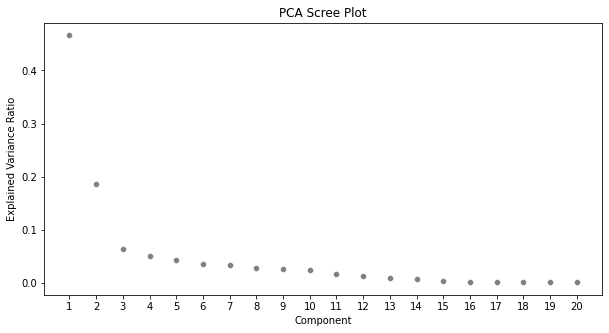

In [37]:
plt.figure(figsize=(10,5))
ax = sns.scatterplot(x=range(1, len(pca.explained_variance_ratio_) + 1),
                     y=pca.explained_variance_ratio_,
                     color='Grey')


ax.set(title='PCA Scree Plot',
       xlabel='Component',
       ylabel='Explained Variance Ratio',
       xticks=range(1, len(pca.explained_variance_ratio_) + 1))
